In [1]:
import os
os.chdir("Y:\Python\Mega_IT\F.Machine_Learning/1.Supervised_Learning/7.SGD")
os.getcwd()

'Y:\\Python\\Mega_IT\\F.Machine_Learning\\1.Supervised_Learning\\7.SGD'

In [2]:
import sys
sys.path.append("Y:\Python\Mega_IT")

import warnings
warnings.filterwarnings('ignore')

from yjk_module.preprocessing import *
from yjk_module.ml_module import *

from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *

In [4]:
origin1 = pd.read_excel("./data/winequality.xlsx")

In [5]:
origin1.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df1 = origin1.copy()

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [9]:
df1.describe(include = 'O')

,type
count,6497
unique,2
top,white
freq,4898


- 미가공 모델 생성
    - 더미화, StandardScaler

In [10]:
pp = YjkPreprocessor()
pp.set_strategy(outline = None, null = 'd', scaler = 'm')

아래와 같이 처리합니다.
+-------------+---------------+
| 범주        | 처리방법      |
|-------------+---------------|
| 이상치 처리 | 처리하지 않음 |
| 결측치 처리 | 결측치 삭제   |
| 스케일러    | MinMaxScaler  |
| 인코딩      | 원핫인코딩    |
+-------------+---------------+


In [11]:
df1['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [12]:
df1_p = pp.fit_transform(df1, yname = 'quality', ylabeling = True)

데이터프레임 크기 : (6497, 13)

[열별 결측치 개수]
+------------------+-------------+
| 열명             |   결측치 수 |
|------------------+-------------|
| fixed acidity    |          10 |
| volatile acidity |           8 |
| citric acid      |           3 |
| residual sugar   |           2 |
| chlorides        |           2 |
| pH               |           9 |
| sulphates        |           4 |
+------------------+-------------+

연속형 데이터 컬럼 : ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'], 총 11개
명목형 데이터 컬럼 : ['type'], 총 1개
종속변수 컬럼명 : quality / 종속변수 라벨링 여부 : True


In [13]:
x_train, x_test, y_train, y_test = my_train_test_split(df1_p, 'quality', test_size = 0.3, random_state = 0)

In [14]:
support = YjkClassifierSupport()

사용 가능한 모델 : ['LogisticRegression', 'SGDClassifier', 'KNeighborsClassifier', 'LinearSVC', 'SVC', 'GaussianNB', 'DecisionTreeClassifier', 'CatboostClassifier']


In [15]:
result_df1 = yjk_classifier_multi_gridsearch(support, x_train, y_train, x_test, y_test, randomized_search = True)

LogisticRegression 모델 소요 시간 : 0:00:09
SGDClassifier 모델 소요 시간 : 0:00:07
KNeighborsClassifier 모델 소요 시간 : 0:00:01
LinearSVC 모델 소요 시간 : 0:00:10
SVC 모델 소요 시간 : 0:01:02
GaussianNB 모델 소요 시간 : 0:00:00
DecisionTreeClassifier 모델 소요 시간 : 0:00:01
총 소요 시간 : 0:01:32


In [16]:
result_df1

,best_model,best_param,accuracy_train,accuracy_test
model_name,,,,
KNeighborsClassifier,"KNeighborsClassifier(n_jobs=-1, n_neighbors=6,...","{'weights': 'distance', 'p': 1, 'n_neighbors': 6}",0.642128,0.649819
DecisionTreeClassifier,"DecisionTreeClassifier(criterion='entropy', ra...","{'splitter': 'best', 'min_samples_split': 2, '...",0.584879,0.585869
SVC,"SVC(C=10, degree=5, kernel='poly')","{'kernel': 'poly', 'degree': 5, 'C': 10}",0.571173,0.570913
SGDClassifier,"SGDClassifier(alpha=0.001, early_stopping=True...","{'tol': 0.001, 'penalty': None, 'max_iter': 10...",0.534919,0.545642
LogisticRegression,"LogisticRegression(C=10, n_jobs=-1)","{'penalty': 'l2', 'max_iter': 100, 'C': 10}",0.546633,0.538422
LinearSVC,"LinearSVC(C=1, dual=True, max_iter=100, random...","{'penalty': 'l2', 'max_iter': 100, 'loss': 'sq...",0.534479,0.537906
GaussianNB,GaussianNB(var_smoothing=1e-05),{'var_smoothing': 1e-05},0.352120,0.365652


In [17]:
my_classification(x_train, y_train, x_test, y_test)

LogisticRegression의 n_jobs 설정됨
LogisticRegression의 random_state 설정됨
LogisticRegression {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [1000]}
KNeighborsClassifier의 n_jobs 설정됨
KNeighborsClassifier {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
SVC의 random_state 설정됨
SVC {'C': [0.1, 1, 10], 'kernel': ['rbf', 'poly', 'sigmoid'], 'degree': [2, 3, 4, 5]}
GaussianNB {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}
DecisionTreeClassifier의 random_state 설정됨
DecisionTreeClassifier {'criterion': ['gini', 'entropy']}
SGDClassifier의 n_jobs 설정됨
SGDClassifier의 random_state 설정됨
SGDClassifier의 early_stopping 설정됨
SGDClassifier {'loss': ['hinge', 'log_loss', 'modified_huber'], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1], 'max_iter': [1000, 2000, 3000, 4000, 5000], 'learning_rate': ['optimal', 'constant', 'invscaling', 'adaptive'], 'eta0': [0.01, 0.1, 0.5]}
+-----------------

{'DecisionTreeClassifier': DecisionTreeClassifier(criterion='entropy', random_state=1234),
 'GaussianNB': GaussianNB(var_smoothing=1e-05),
 'LogisticRegression': LogisticRegression(C=10, max_iter=1000, n_jobs=1, random_state=1234),
 'KNeighborsClassifier': KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=7, p=1,
                      weights='distance'),
 'SVC': SVC(C=10, degree=5, kernel='poly', random_state=1234),
 'SGDClassifier': SGDClassifier(early_stopping=True, eta0=0.5, learning_rate='adaptive',
               loss='log_loss', max_iter=3000, n_jobs=-1, penalty='elasticnet',
               random_state=1234)}

In [18]:
knn = result_df1.loc['KNeighborsClassifier', 'best_model']

In [19]:
support.call_model('KNeighborsClassifier', return_model = False)

[KNeighborsClassifier의 파라미터]
+--------------+------------------------------------------------------------------------+-------------------------+
| 파라미터명   | 파라미터 노트                                                          | 파라미터 범위           |
|--------------+------------------------------------------------------------------------+-------------------------|
| n_neighbors  | 데이터로부터 뽑는 최근접 이웃의 수, 정수값, 기본은 5                   | [3, 4, 5, 6, 7]         |
| weights      | 가중치 함수, 기본은 uniform(사용 안함), 콜백함수를 넣을수도 있음       | ['uniform', 'distance'] |
| p            | float 혹은 int, 1은 맨하탄 거리 측정, 2는 유클리디안 거리 측정(기본값) | [1, 2]                  |
+--------------+------------------------------------------------------------------------+-------------------------+


In [20]:
params = support.get_params()
params['n_neighbors'] = range(1, 11)

[n_neighbors 파라미터, 기존값 : 6]


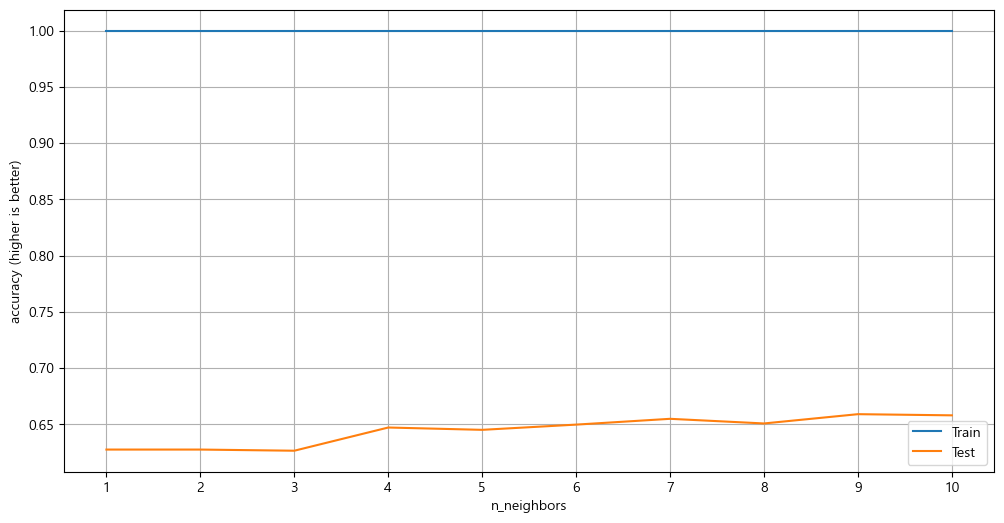

+---------------+---------------+---------------+-----------+
|   n_neighbors |   훈련 데이터 |   검증 데이터 | Min-Max   |
|---------------+---------------+---------------+-----------|
|             1 |             1 |      0.627643 |           |
|             2 |             1 |      0.627643 |           |
|             3 |             1 |      0.626612 | 최소값    |
|             4 |             1 |      0.647241 |           |
|             5 |             1 |      0.645178 |           |
|             6 |             1 |      0.649819 |           |
|             7 |             1 |      0.654977 |           |
|             8 |             1 |      0.650851 |           |
|             9 |             1 |      0.659103 | 최대값    |
|            10 |             1 |      0.658071 |           |
+---------------+---------------+---------------+-----------+

[weights 파라미터, 기존값 : distance]


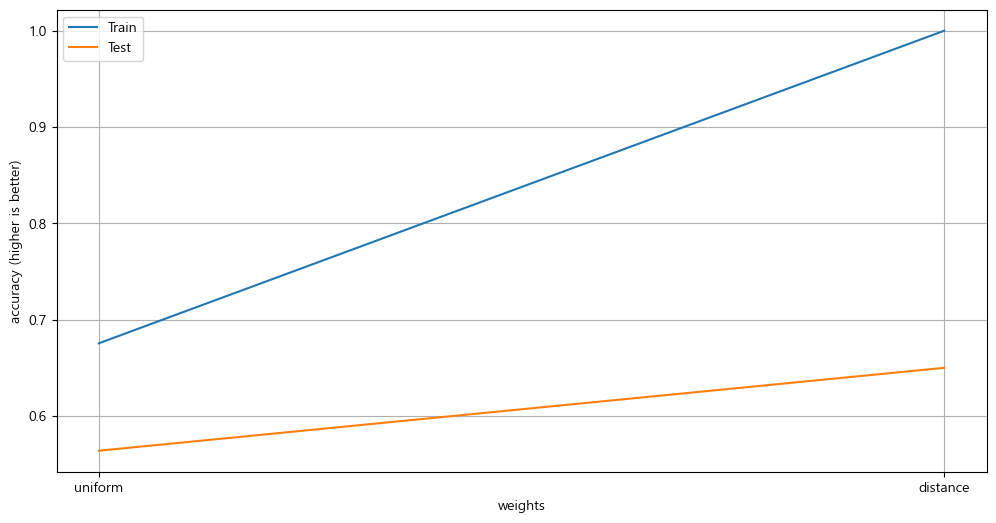

+-----------+---------------+---------------+-----------+
| weights   |   훈련 데이터 |   검증 데이터 | Min-Max   |
|-----------+---------------+---------------+-----------|
| uniform   |      0.675287 |      0.563693 | 최소값    |
| distance  |             1 |      0.649819 | 최대값    |
+-----------+---------------+---------------+-----------+

[p 파라미터, 기존값 : 1]


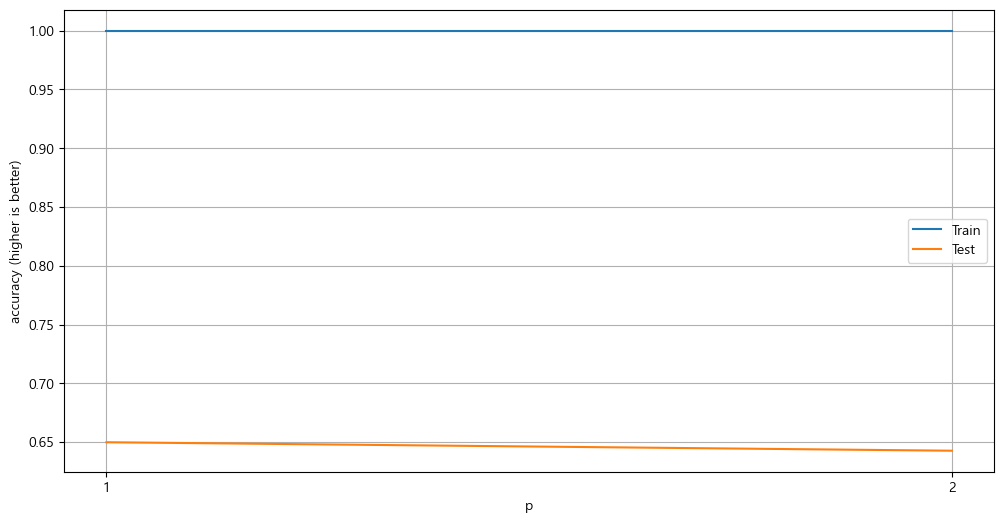

+-----+---------------+---------------+-----------+
|   p |   훈련 데이터 |   검증 데이터 | Min-Max   |
|-----+---------------+---------------+-----------|
|   1 |             1 |      0.649819 | 최대값    |
|   2 |             1 |      0.642599 | 최소값    |
+-----+---------------+---------------+-----------+



In [21]:
for i, v in enumerate(params.keys()):
    print(f"[{v} 파라미터, 기존값 : {knn.get_params()[v]}]")
    yjk_classification_param_plot(knn, x_train, y_train, v, params[v], x_test = x_test, y_test = y_test, as_tabulate = True)
    print("")

- KNeighborsClassifier 성능이 가장 우수함

In [22]:
df1

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [23]:
df1_2 = df1.dropna()

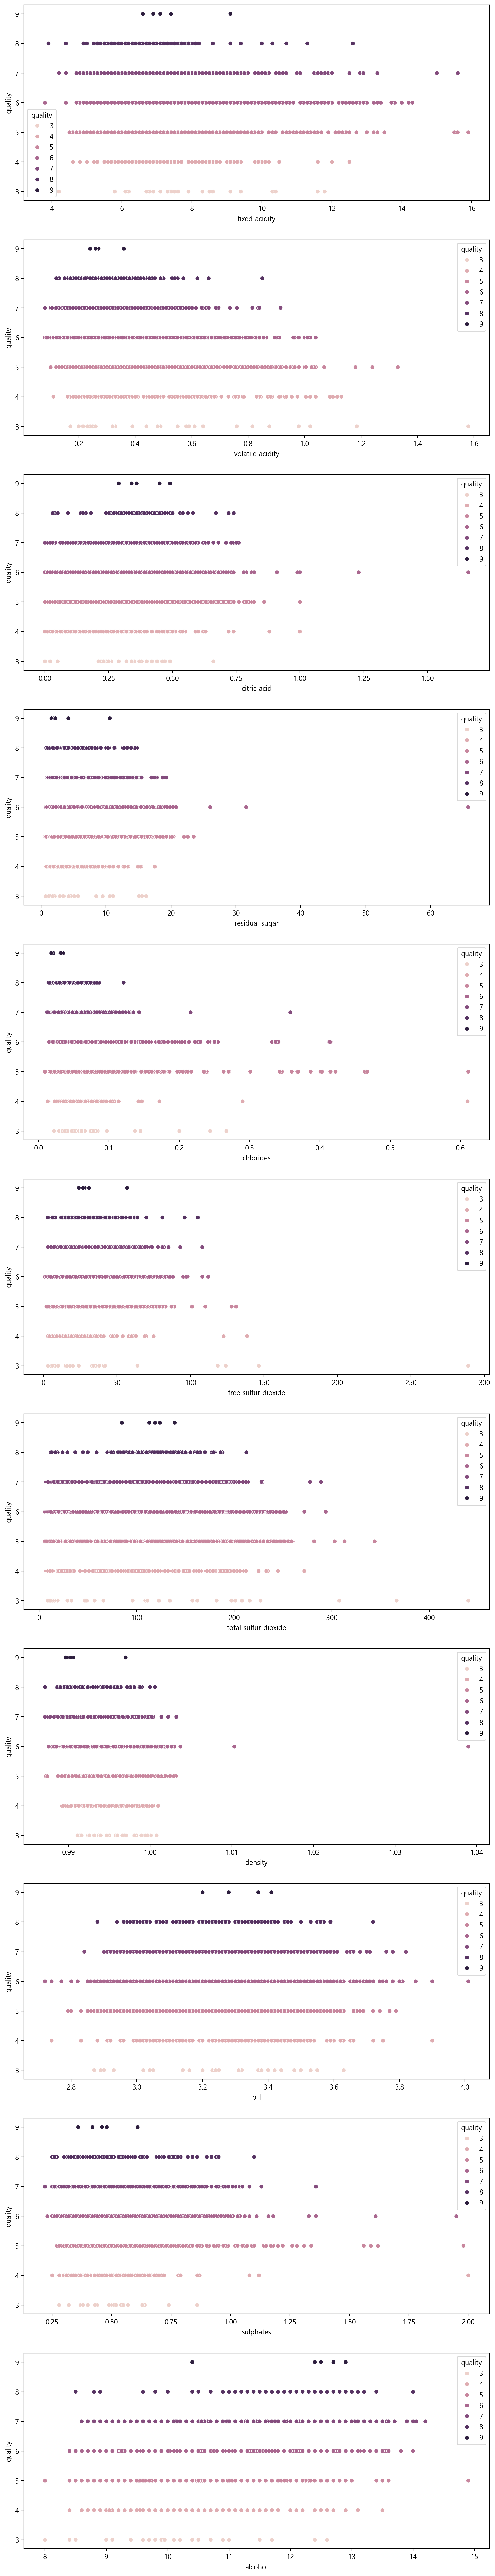

In [24]:
cols = df1_2.drop('quality', axis = 1).select_dtypes('number').columns

fig, ax = plt.subplots(len(cols), 1, figsize = (12, 6 * len(cols)))
ax = ax.flatten()

for i, v in enumerate(cols):
    sb.scatterplot(data = df1_2, x = v, y = 'quality', hue = 'quality', ax = ax[i])
plt.show()

In [36]:
df1_3 = origin1.copy()
df1_3['target'] = origin1['quality'].apply(lambda x : 'good' if x > 5 else 'bad')
df1_3.drop('quality', axis = 1, inplace = True)
df1_3.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,good
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,good
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,good
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,good
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,good


In [38]:
df1_3_p = pp.fit_transform(df1_3, yname = 'target', ylabeling = True)

데이터프레임 크기 : (6497, 13)

[열별 결측치 개수]
+------------------+-------------+
| 열명             |   결측치 수 |
|------------------+-------------|
| fixed acidity    |          10 |
| volatile acidity |           8 |
| citric acid      |           3 |
| residual sugar   |           2 |
| chlorides        |           2 |
| pH               |           9 |
| sulphates        |           4 |
+------------------+-------------+

연속형 데이터 컬럼 : ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'], 총 11개
명목형 데이터 컬럼 : ['type'], 총 1개
종속변수 컬럼명 : target / 종속변수 라벨링 여부 : True


In [39]:
x_train, x_test, y_train, y_test = my_train_test_split(df1_3_p, yname = 'target', test_size = 0.2, random_state = 0)

In [42]:
sgd = SGDClassifier()

In [43]:
train_li = []
test_li = []

for _ in range(500):
    sgd.partial_fit(x_train, y_train, classes = y_train.unique())
    train_li.append(sgd.score(x_train, y_train))
    test_li.append(sgd.score(x_test, y_test))

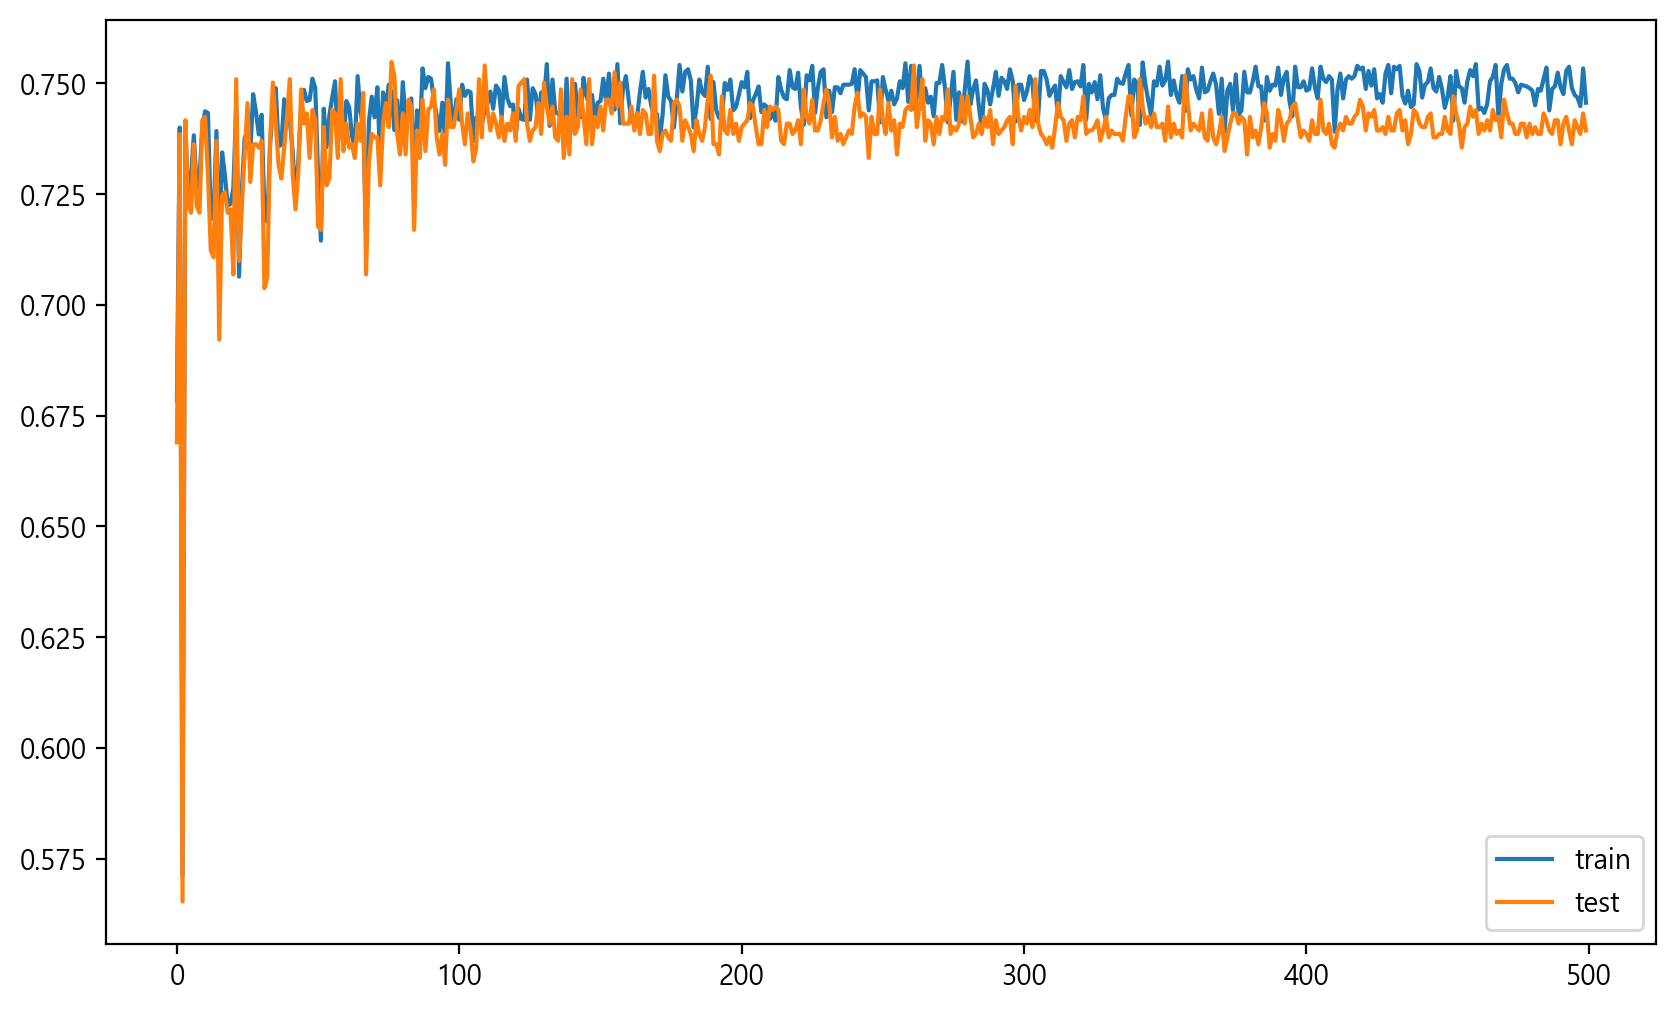

In [45]:
plt.figure()
plt.plot(train_li, label = 'train')
plt.plot(test_li, label = 'test')
plt.legend()
plt.show()